In [4]:
#Preparing all libraries
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import numpy as np
from scipy.optimize import curve_fit
from scipy.linalg import svd
from scipy.stats import trim_mean

In [5]:
#Assumed echo time points
TE_series = np.linspace(8, 512, 64) #ms units
assert(TE_series[-1] == 512)
assert(np.mean(np.diff(TE_series))==8)

######All Fixed parameters for code
#Parameters held constant
c1 = 0.4
c2 = 0.6 #0.5
T21 = 45
T22 = 100
T11 = 1100
T12 = 1200

initParams = np.array([T11, T12, c1, c2, T21, T22])


### Generating the TI array
desired_TI_low = 2
desired_TI_high = 3.4

TI_numpoints = 15

TI_array = np.logspace(desired_TI_low, desired_TI_high, 15)


In [6]:
def S_biX_6p(TE, TI, T11, T12, c1, c2, T21, T22):
    exp1 = c1*(1-2*np.exp(-TI/T11))*np.exp(-TE/T21)
    exp2 = c2*(1-2*np.exp(-TI/T12))*np.exp(-TE/T22)
    return exp1 + exp2

#The ravel structure necessary for the curve_fit algorithm
def S_biX_6p_ravel(T_dat, T11, T12, c1, c2, T21, T22):
    TE, TI = T_dat
    exp1 = c1*(1-2*np.exp(-TI/T11))*np.exp(-TE/T21)
    exp2 = c2*(1-2*np.exp(-TI/T12))*np.exp(-TE/T22)
    return exp1 + exp2

In [7]:
TImg,TEmg = np.meshgrid(TI_array,TE_series)

sig = S_biX_6p(TEmg, TImg, *initParams)

print(TI_array.shape)
print(TE_series.shape)
print(sig.shape)
print(TImg.shape)
print(TEmg.shape)

(15,)
(64,)
(64, 15)
(64, 15)
(64, 15)


C:\Users\griff\AppData\Local\Temp\ipykernel_1196\2695893476.py:17: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


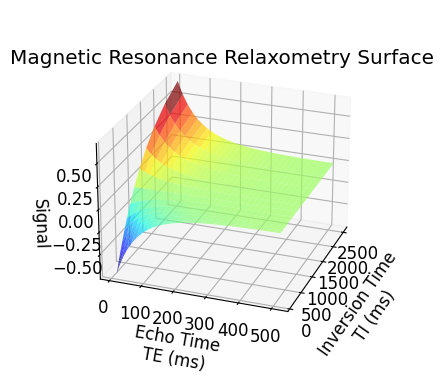

In [8]:
fig = plt.figure(figsize = (6,4), tight_layout=True)
plt.rc('font', size = 12)
ax = plt.axes(projection='3d')
# my_col = cm.jet(sig/np.amax(sig))
ax.plot_surface(TImg,TEmg, sig, alpha = 0.7, cmap = cm.jet)
ax.view_init(25,20)
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 12
ax.zaxis.labelpad = 9

ax.invert_xaxis()

ax.set_xlabel('Inversion Time\nTI (ms)')
ax.set_ylabel('Echo Time\nTE (ms)')
ax.set_zlabel('Signal')
ax.set_title('Magnetic Resonance Relaxometry Surface', y=1.0, pad=-18)
ax.dist = 12

plt.show()


In [57]:
T1_constant = 40
T2_constant = 25
TI_max_time = 3.5*T1_constant


TI_setup = np.arange(0, TI_max_time+1, 1)
TE_setup = np.arange(8, 8*20, 8)

data_inversion = 1 - 2 * np.exp(-TI_setup/T1_constant)
switch_point = 1 - 2 * np.exp(-TI_max_time/T1_constant)
measured_points = switch_point * np.exp(-TE_setup/T2_constant)

TE_series_extended = TI_max_time + TE_setup


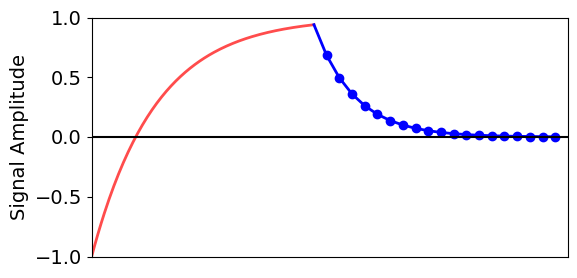

In [58]:
fig, ax = plt.subplots(1,1, figsize=(6,3), tight_layout=True)
plt.rc('font', size = 14)
# fig.suptitle(f'Noised Curves - spaced {TI_blurb}')

ax.plot(TI_setup, data_inversion, alpha = 0.7, color = 'r', ls = '-', lw = '2')
ax.plot(TE_series_extended, measured_points, 'b', ls = '-', marker = 'o', lw = '2')
ax.plot([TI_max_time, TE_series_extended[0]], [switch_point, measured_points[0]], color = 'b', ls = '-', lw = '2')

# ax.set_xlabel('Experiment Time (ms)')
ax.set_ylabel('Signal Amplitude')
ax.set_ylim([-1, 1])
ax.set_xlim([0, 300])
ax.axhline(y = 0, color = 'k')
ax.axes.get_xaxis().set_visible(False)
# ax.plot(TE_DATA, nullpoint_curve1, alpha = 0.7, color = 'k', ls = '--', lw = 2)
# ax.plot(TE_DATA, nullpoint_curve2, alpha = 0.7, color = 'k', ls = ':', lw = 3)

plt.show()